<a href="https://colab.research.google.com/github/yeong0000/Python/blob/main/py17_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 임포트

In [39]:
import numpy as np # ndarray
import pandas as pd # Series, DataFrame
import matplotlib.pyplot as plt # 시각화(그래프)
import seaborn as sns # 시각화, 예제 데이터

# tips 데이터셋

In [40]:
tips = sns.load_dataset('tips')

In [41]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box plot

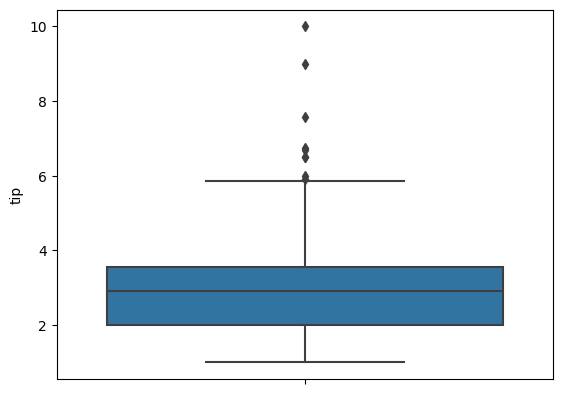

In [42]:
# tip 컬럼의 box plot
sns.boxplot(data=tips, y='tip')
plt.show()

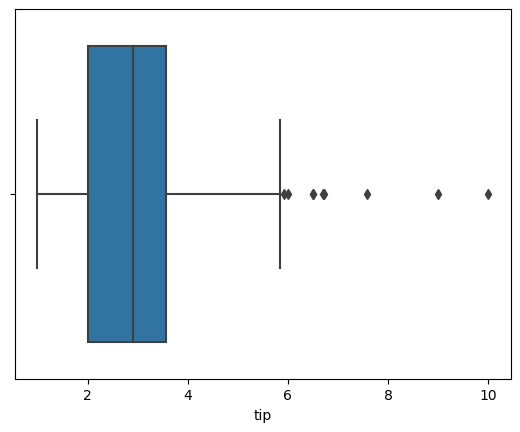

In [43]:
sns.boxplot(data=tips, x='tip')
plt.show()

## 그룹(카테고리)별 box plot

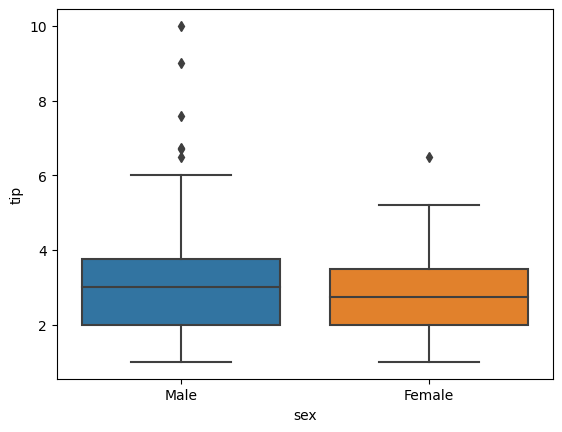

In [44]:
# 성별 tip의 box plot
sns.boxplot(data=tips, x='sex', y='tip')
plt.show()

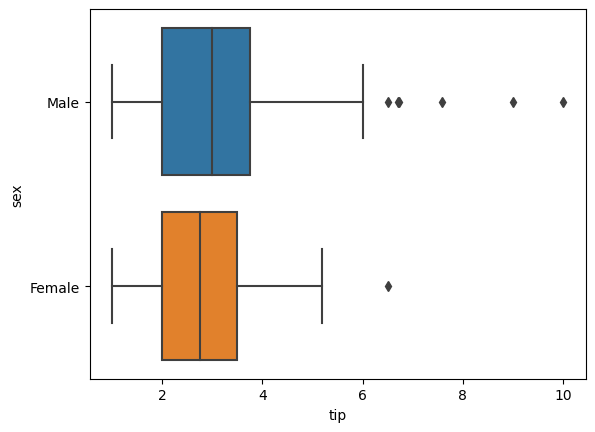

In [45]:
sns.boxplot(data=tips, x='tip', y='sex')
plt.show()

요일별 tip의 box plot

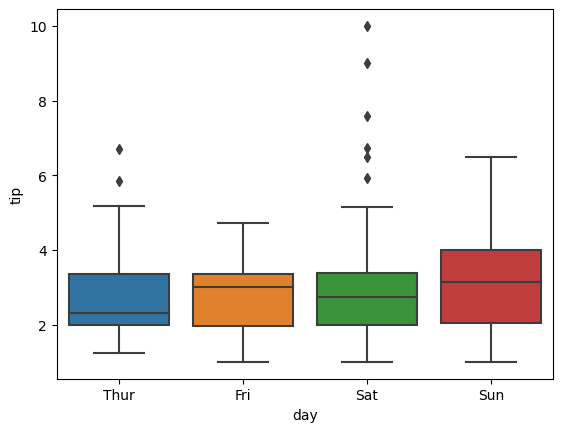

In [46]:
sns.boxplot(data=tips, x='day', y='tip')
plt.show()

*  subplot 2개를 생성.
*  각각의 subplot에 흡연여부별 tips의 box plot, 시간별 box plot을 그리세요.

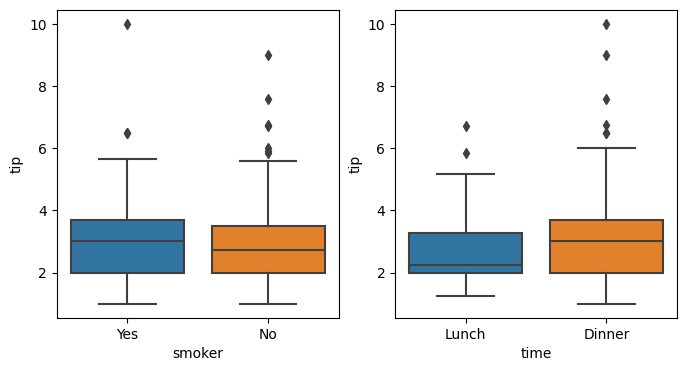

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

sns.boxplot(data=tips, x='smoker', y='tip', ax=ax[0])
sns.boxplot(data=tips, x='time', y='tip', ax=ax[1])
plt.show()

# 막대 그래프

## `countplot()` 함수

카테고리 타입 변수의 빈도수를 막대로 표현한 그래프

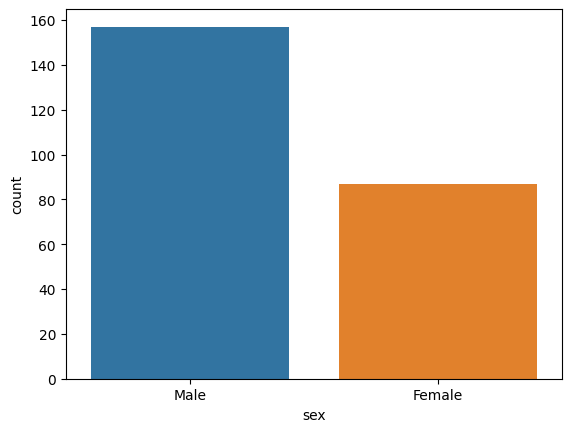

In [48]:
# 성별 빈도수 세로 막대 그래프
sns.countplot(data=tips,x='sex')

plt.show()

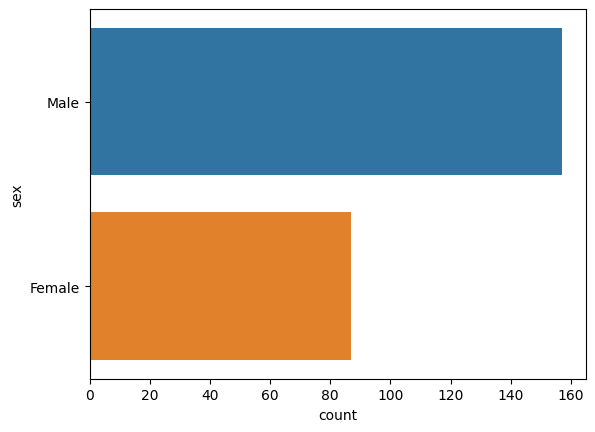

In [49]:
# 성별 빈도수 가로 막대 그래프
sns.countplot(data=tips, y='sex')
plt.show()

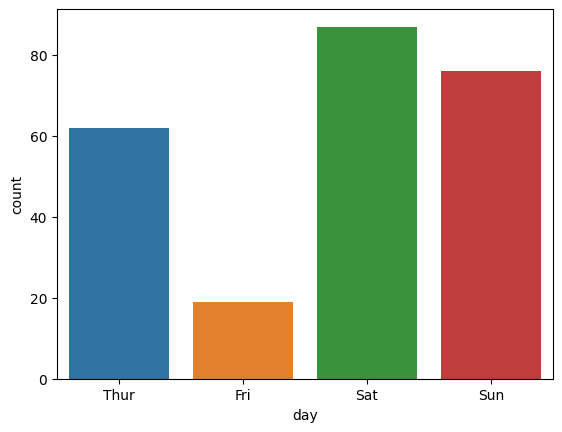

In [50]:
# 요일 빈도수 막대 그래프
sns.countplot(data=tips, x='day')
plt.show()

In [51]:
# 요일별 성별 빈도수
tips.groupby(['day','sex']).tip.count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64

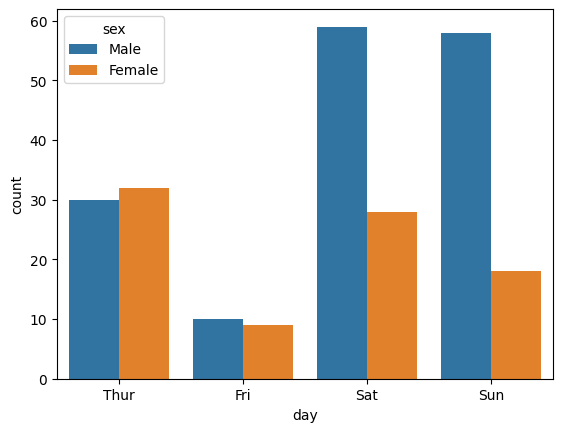

In [52]:
sns.countplot(data=tips, x='day',hue='sex')
# hue 파라미터: 그룹(카테고리)별로 다른 색깔을 설정할 때.
plt.show()

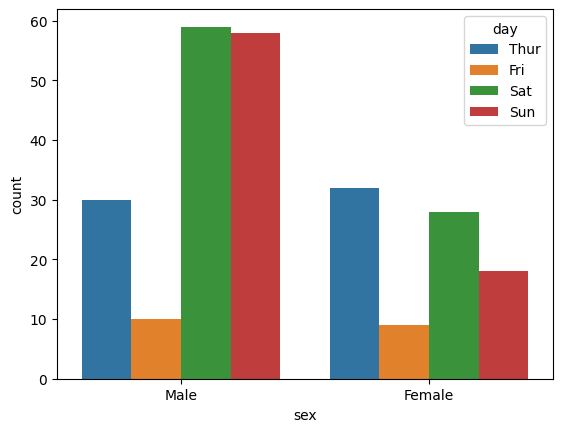

In [53]:
sns.countplot(data=tips, x='sex', hue='day')
plt.show()

In [54]:
# 성별, 흡연여부별 빈도수
tips.groupby(['sex','smoker']).tip.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: tip, dtype: int64

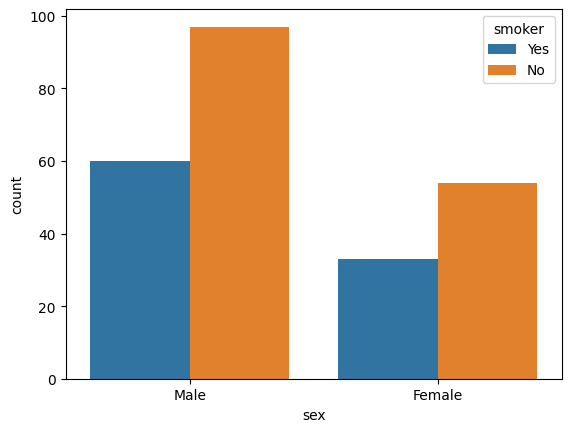

In [55]:
sns.countplot(data=tips, x='sex', hue='smoker')
plt.show()

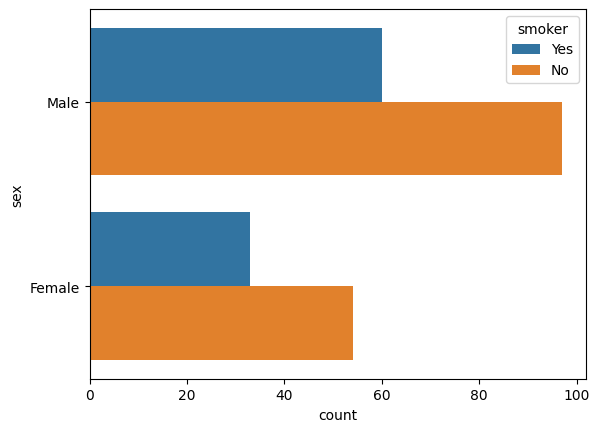

In [56]:
sns.countplot(data=tips, y='sex', hue='smoker')
plt.show()

## `barplot()` 함수

* 그룹(카테고리) 별로 변수의 통계량(평균, 표준편차, 중앙값,...)을 막대 그래프로 표현.
* 통계량 계산 함수의 기본값은 평균(mean)
* 카테고리 타입 변수와 숫자 타입 변수를 함꼐 시각화.

In [57]:
# 성별 tip의 평균
tips.groupby('sex').tip.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

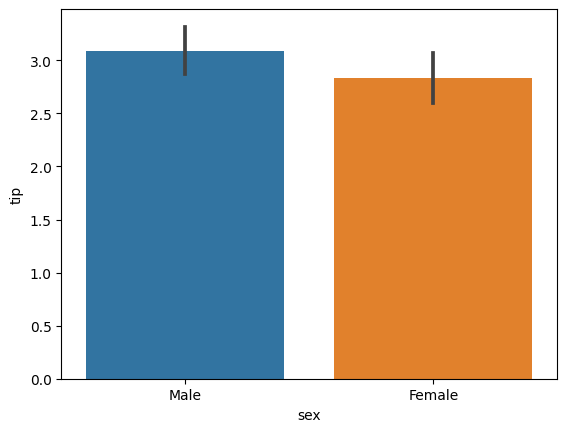

In [58]:
sns.barplot(data=tips, x='sex', y='tip')  # estimator='mean': 기본값, 평균 계산.
plt.show()

In [59]:
tips.groupby('sex').tip.median()  # 중위값, 중앙값, 50%

sex
Male      3.00
Female    2.75
Name: tip, dtype: float64

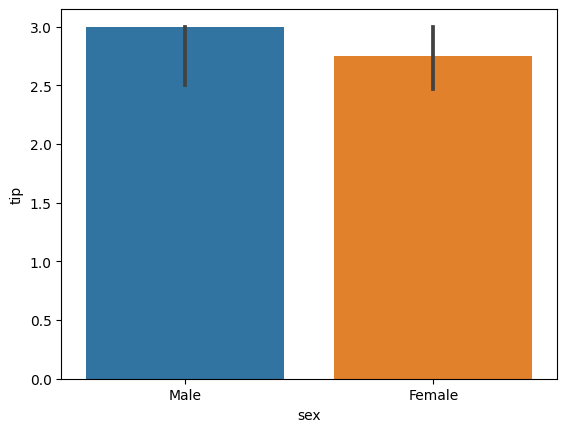

In [60]:
sns.barplot(data=tips,x='sex',y='tip',estimator='median') # np.median 가능
plt.show()

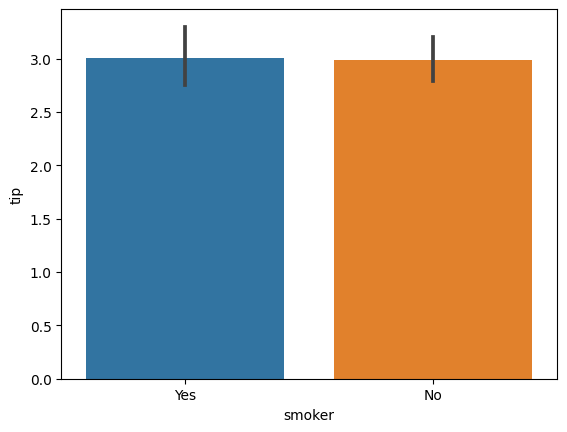

In [61]:
# 흡연여부별 tip의 평균을 시각화
sns.barplot(data=tips, x='smoker',y='tip')
plt.show()

In [62]:
# 성별 흡연여부별 tip의 평균을 시각화
tips.groupby(['sex','smoker']).tip.mean()

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

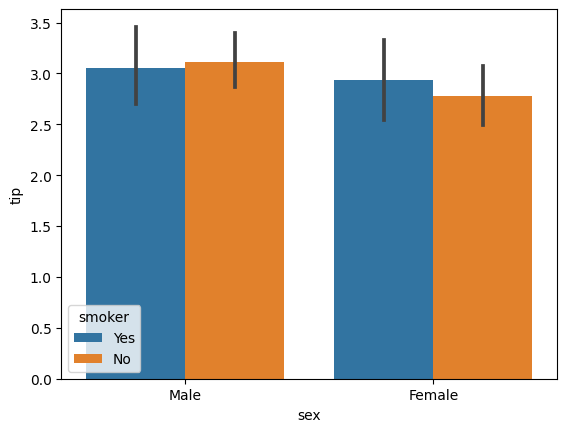

In [63]:
sns.barplot(data=tips,x='sex',y='tip',hue='smoker')
plt.show()

# 산점도: `scatterplot()`

*  tip ~ total_bill 산점도

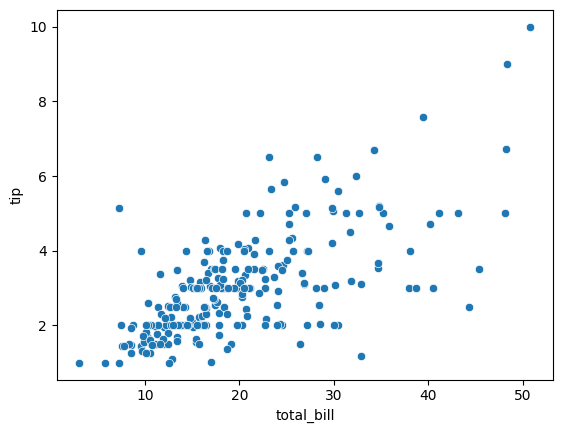

In [64]:
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

* tip ~ total_bill 산점도
* 성별에 따라서 점의 색깔이 다르게 표현

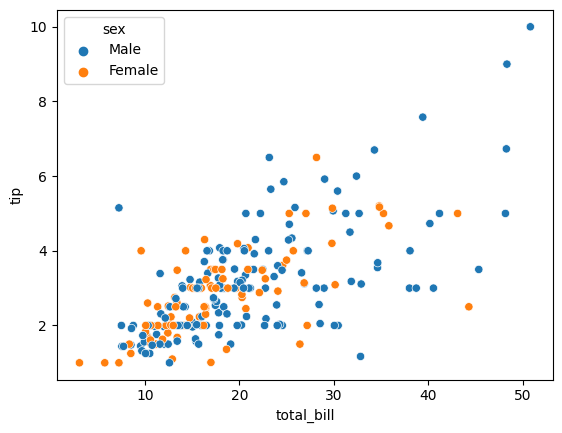

In [65]:
sns.scatterplot(data=tips, x='total_bill',y='tip',hue='sex')
plt.show()

* tip ~ total_bill
* 성별에 따라서 점의 색깔을 다르게
* 흡연여부에 따라서 점의 모양을 다르게.

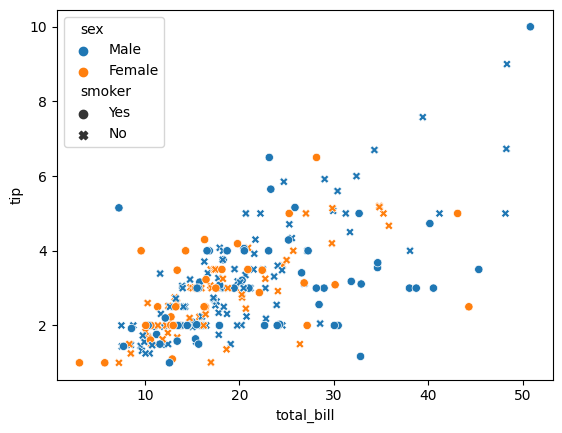

In [66]:
sns.scatterplot(data=tips, x='total_bill',y='tip',hue='sex', style='smoker')
plt.show()

* tip ~ total_bill 산점도
* 점의 색깔은 성별에 따라서 다르게 표현
* 점의 모양은 흡연여부에 따라서 다르게 표현
* 점의 크기를 인원수에 따라서 다르게 표현

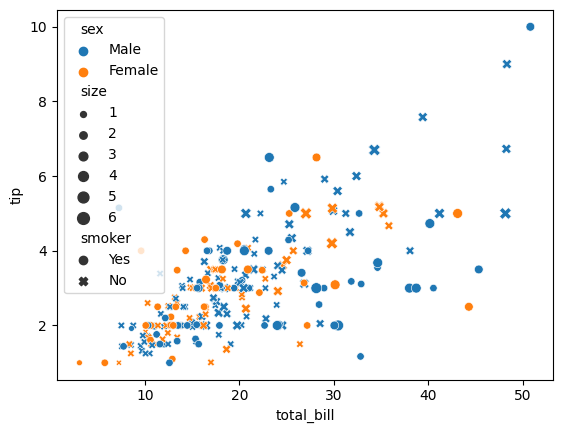

In [67]:
sns.scatterplot(data=tips, x='total_bill',y='tip',hue='sex',style='smoker',size='size')
plt.show()

# 카테고리 그래프: `catplot()`

카테고리 별로 subplot들을 생성하고 통계값(평균, 중앙값,...) 계산해서, 각각의 subplot에 같은 종류의 그래프들을 시각화.

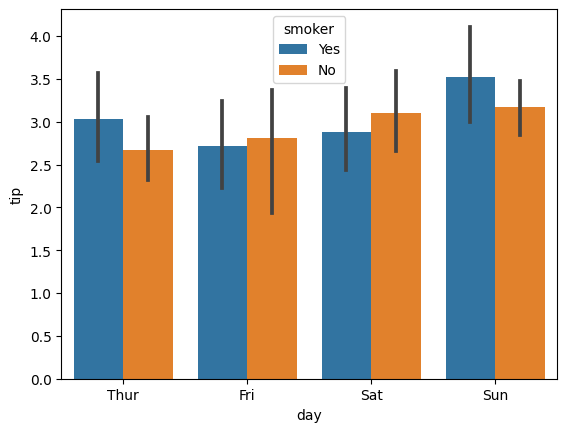

In [68]:
# 요일별, 흡연여부별 팁의 평균을 막대 그래프로 표현
sns.barplot(data=tips, x='day', y='tip', hue='smoker')
plt.show()

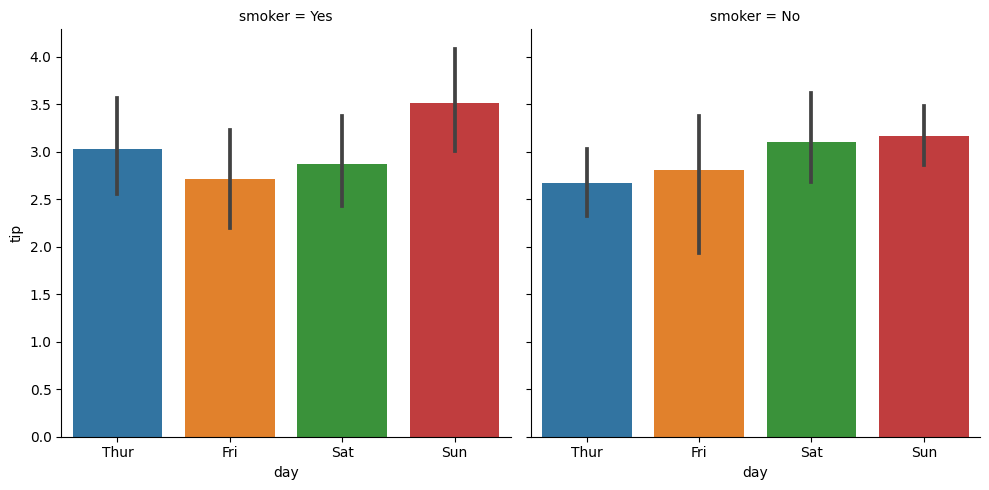

In [69]:
sns.catplot(data=tips, x='day', y='tip', col='smoker',kind='bar')
plt.show()

* 요일별 팁의 평균 막대 그래프
* 시간(Lunch, Dinner)별로 subplot을 생성.

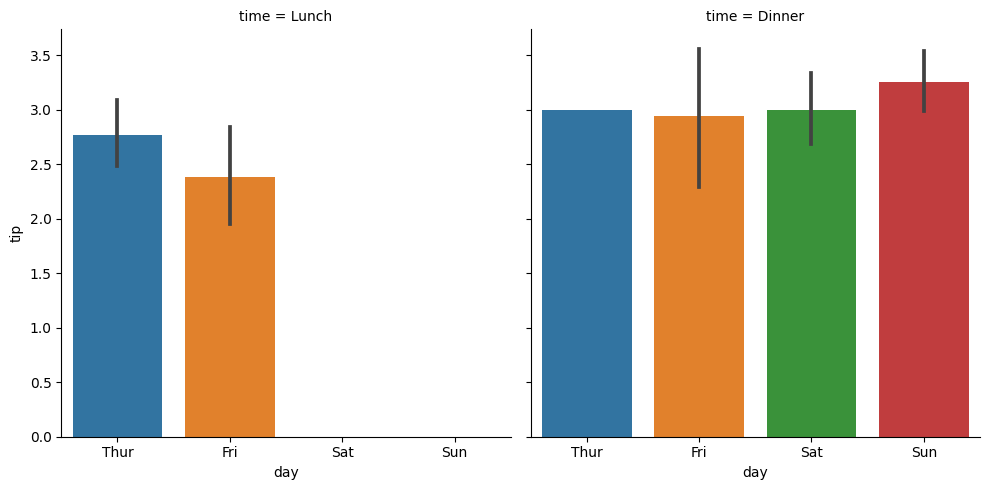

In [70]:
sns.catplot(data=tips, x='day', y='tip', col='time',kind='bar')
plt.show()

* 요일별 팁의 평균 막대 그래프
* 흡연여부별로 subplot
* 시간별 subplot

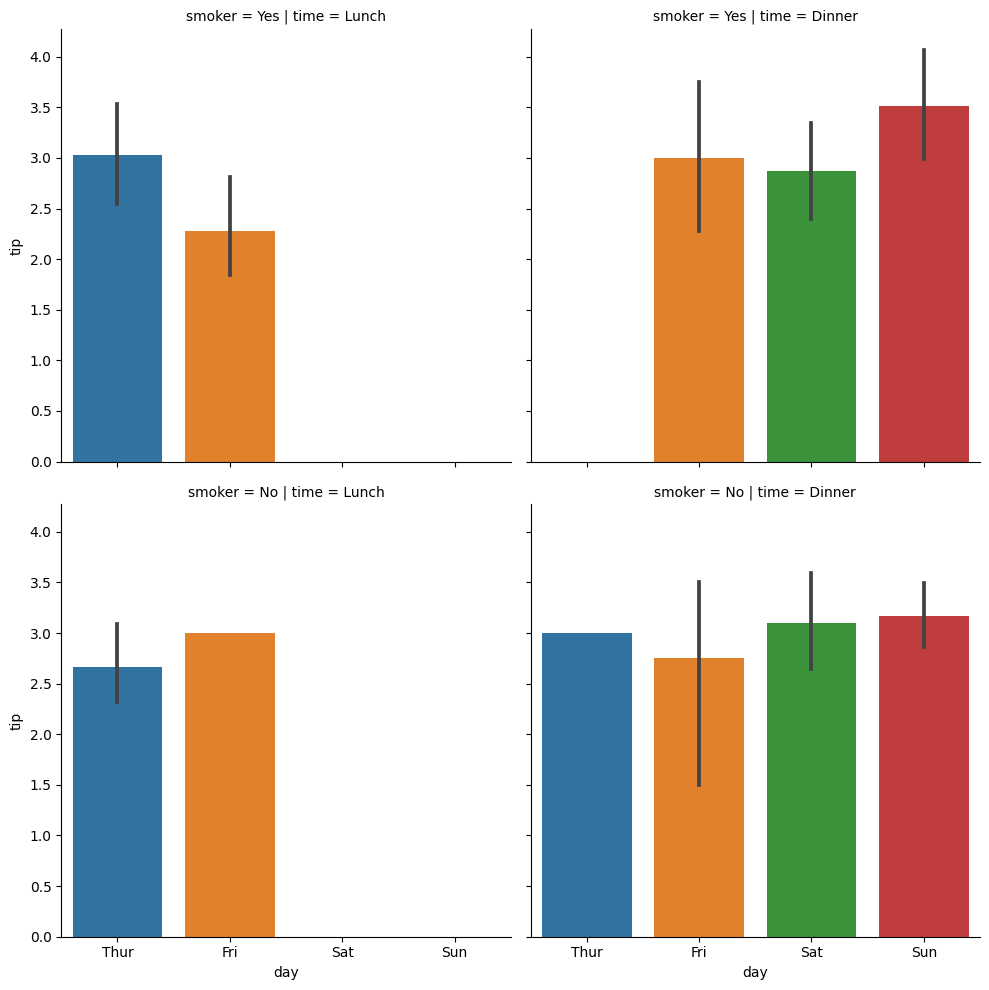

In [71]:
sns.catplot(data=tips, x='day', y='tip',row='smoker',col='time',kind='bar')
plt.show()

* 요일별 성별 팁의 막대 그래프
* 시간별 subplot

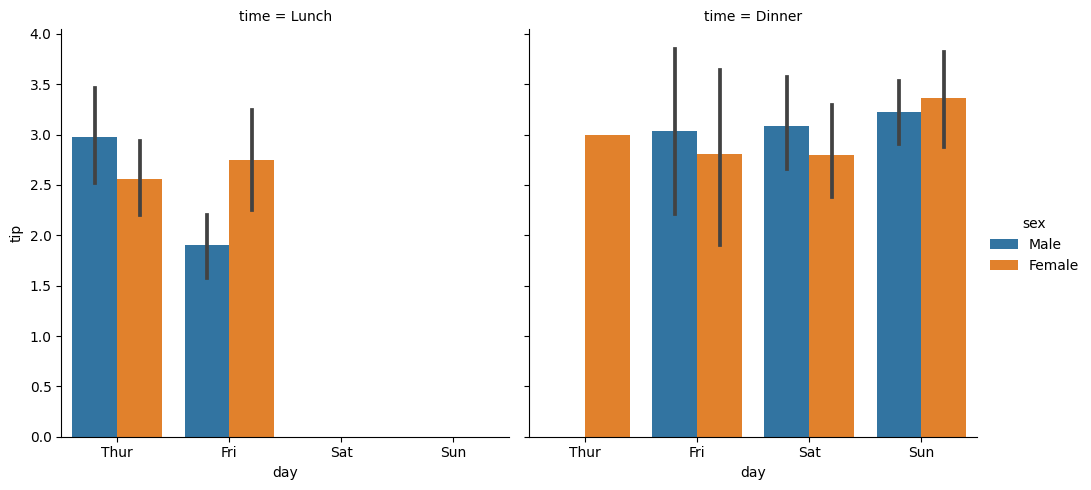

In [72]:
sns.catplot(data=tips, x='day', y='tip',hue='sex',col='time',kind='bar')
plt.show()

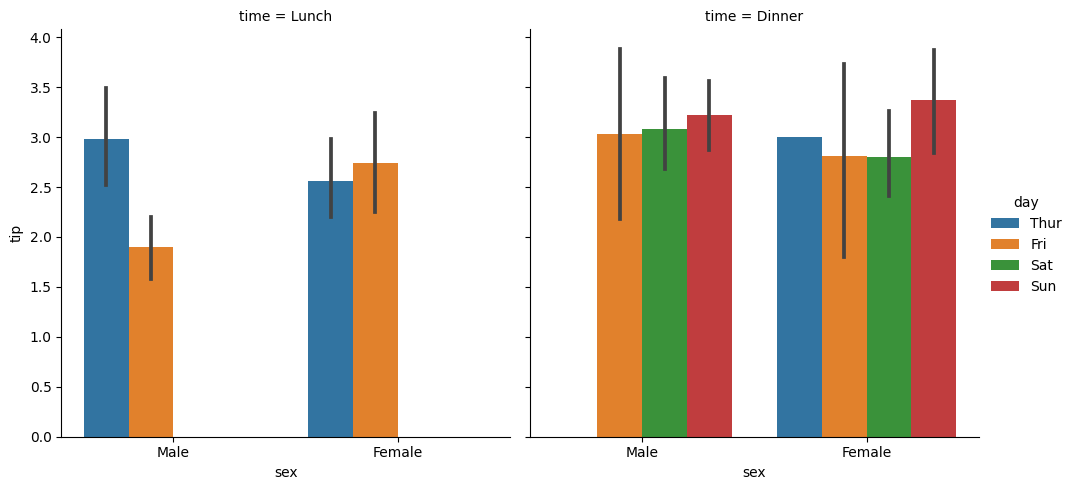

In [77]:
sns.catplot(data=tips, x='sex', y='tip', hue='day',col='time',kind='bar')
plt.show()

*  성별 팁의 box plot
*  요일별로 subplot

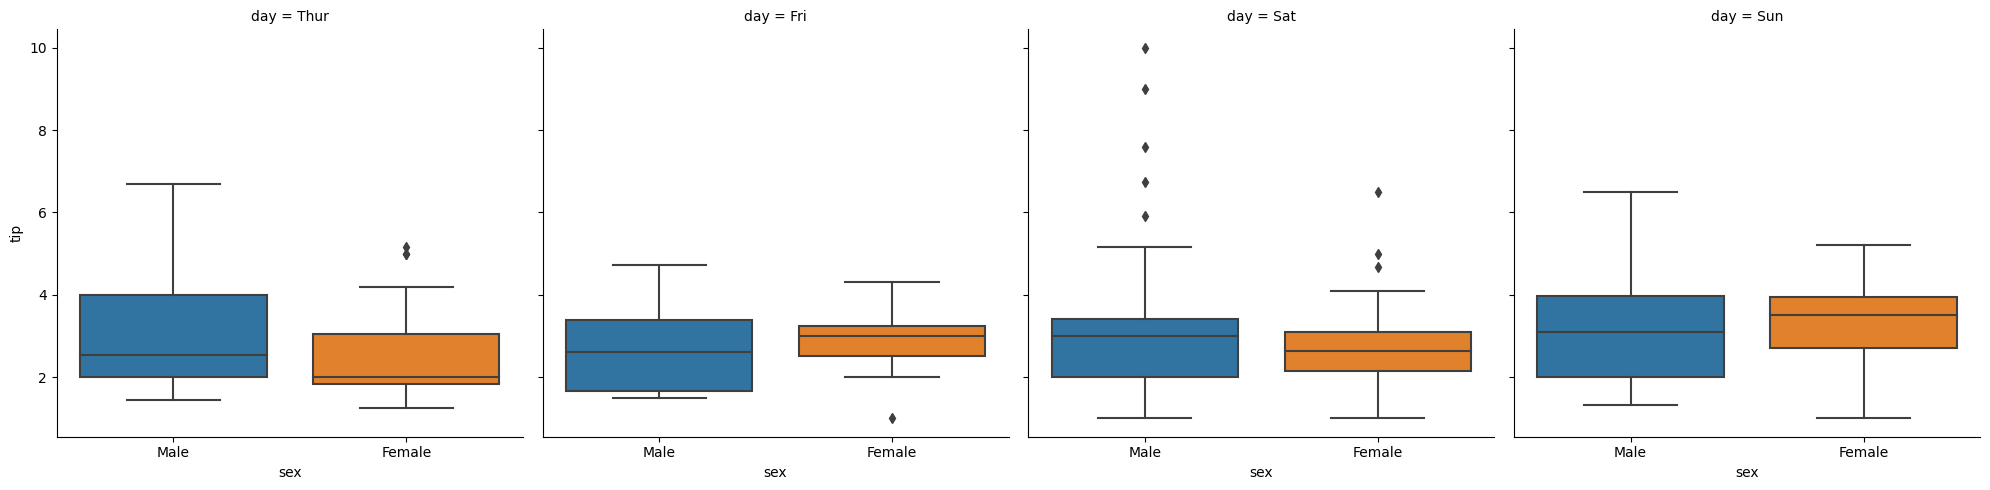

In [74]:
sns.catplot(data=tips, x='sex', y='tip',col='day', kind='box')
plt.show()